In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
Train,Test=boston_housing.load_data()

In [3]:
XT,YT=Train
print(XT.shape,YT.shape)
Xt,Yt=Test
print(Xt.shape,Yt.shape)

((404, 13), (404,))
((102, 13), (102,))


In [4]:
mean=XT.mean(axis=0)
std=XT.std(axis=0)
XT=(XT-mean)/std
Xt=(Xt-mean)/std

In [5]:
#sequential api
#functional api
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as k
import numpy as np
def r2_score(y_true,y_pred):
    #y_true=k.array(y_true)
    #y_pred=k.array(y_pred)
    num=k.sum((y_true-y_pred)**2)
    denom=k.sum((y_true-k.mean(y_true))**2)
    return 1-num/denom
def getModel():
    model=Sequential() 
    # in first it is mandatory to provide the input shape and after that it will predict the no of layers automatically
    model.add(Dense(64,activation='relu',input_shape=(13,)))
    model.add(Dense(32,activation='relu'))
    #this below code represents the output
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    return model

In [6]:
model=getModel()
model.summary()
hist=model.fit(XT,YT,verbose=1,epochs=30,validation_data=(Xt,Yt))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 0s 490us/step - loss: 564.5408 - r2_score: -6.2865 - val_loss: 573.2254 - val_r2_score: -6.4719
Epoch 2/30
404/404 [==============================] - 0s 35us/step - loss: 525.7559 - r2_score: -5.7589 - val_loss: 529.9738 - val_r2_score: -5.8988
Epoch 3/30
404/404 [==============================] - 0s 48

In [7]:
val_loss=hist.history['val_loss']
train_loss=hist.history['loss']

In [8]:
import matplotlib.pyplot as plt
plt.plot(val_loss)
plt.plot(train_loss)
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
r2_score_train = hist.history ['r2_score']
r2_score_val = hist.history ['val_r2_score']

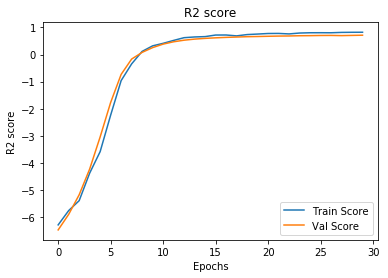

In [10]:
plt.plot(r2_score_train,label="Train Score")
plt.plot(r2_score_val,label="Val Score")
plt.legend()
plt.title("R2 score")
#one epoch is one iteration over dataset
plt.xlabel("Epochs")
plt.ylabel("R2 score")
plt.show()

In [11]:
model.predict(Xt)

array([[ 9.41744 ],
       [17.218414],
       [20.575535],
       [32.92956 ],
       [26.098202],
       [16.279703],
       [25.537415],
       [21.977257],
       [19.347546],
       [19.88855 ],
       [17.347736],
       [17.250925],
       [18.170576],
       [41.971966],
       [16.388958],
       [20.206991],
       [26.305817],
       [21.66705 ],
       [17.426674],
       [28.519043],
       [11.924742],
       [14.074302],
       [19.42487 ],
       [12.518492],
       [24.827282],
       [20.800505],
       [30.880835],
       [30.156185],
       [12.077208],
       [22.291386],
       [18.707027],
       [13.819953],
       [31.566328],
       [24.697067],
       [14.480701],
       [ 8.565669],
       [14.023103],
       [14.977058],
       [21.375526],
       [27.206314],
       [29.88304 ],
       [29.468739],
       [15.779575],
       [38.3518  ],
       [32.65414 ],
       [23.825314],
       [25.359076],
       [13.998823],
       [21.722534],
       [21.866838],
